In [1]:
import astropy.units as u
import astropy.coordinates as coord
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/adrian/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# assuming all RRLyrae above have [Fe/H] = -1.5
def V_to_dist(V, feh=-1.5):
    mu = V - (0.214 * (feh + 1.5) + 0.45)
    distance = 10**(1 + mu/5) * u.pc
    return distance.to(u.kpc)

# this contains all Catalina RR Lyrae stars
tbl = ascii.read("/Users/adrian/projects/streams/data/catalog/Catalina_all_RRLyr.txt")
tbl.remove_column("Num")
c = coord.SkyCoord(ra=tbl['RAdeg'].data*u.deg, dec=tbl['DEdeg'].data*u.deg)
gal = c.galactic

box = [100,160,-35,-15]*u.degree

ix = ((c.galactic.l > box[0]) & (c.galactic.l < box[1]) & 
      (c.galactic.b > box[2]) & (c.galactic.b < box[3]))
triand = tbl[ix].filled()
# d = V_to_dist(triand['<Vmag>'].data).to(u.kpc).value
d = triand['dh']
gal = gal[ix]

In [29]:
# the actual data
gc = coord.Galactic(l=gal.l, b=gal.b, distance=d.quantity).transform_to(coord.Galactocentric)
xyz = gc.cartesian.xyz
d_ix = (d > 15*u.kpc) & (d < 21*u.kpc)

In [30]:
np.median(gc.represent_as(coord.CylindricalRepresentation)[d_ix].z)

<Quantity -7.846286483098468 kpc>

In [14]:
# a grid to show selection area
# ls = np.linspace(100.,160,25)
# bs = np.linspace(-35.,-15,25)
# ds = np.linspace(15,21,25)
# l,b,d = map(np.ravel,np.meshgrid(ls, bs, ds))
# xyz = coord.Galactic(l=l*u.deg, b=b*u.deg, distance=d*u.kpc).transform_to(coord.Galactocentric).cartesian.xyz

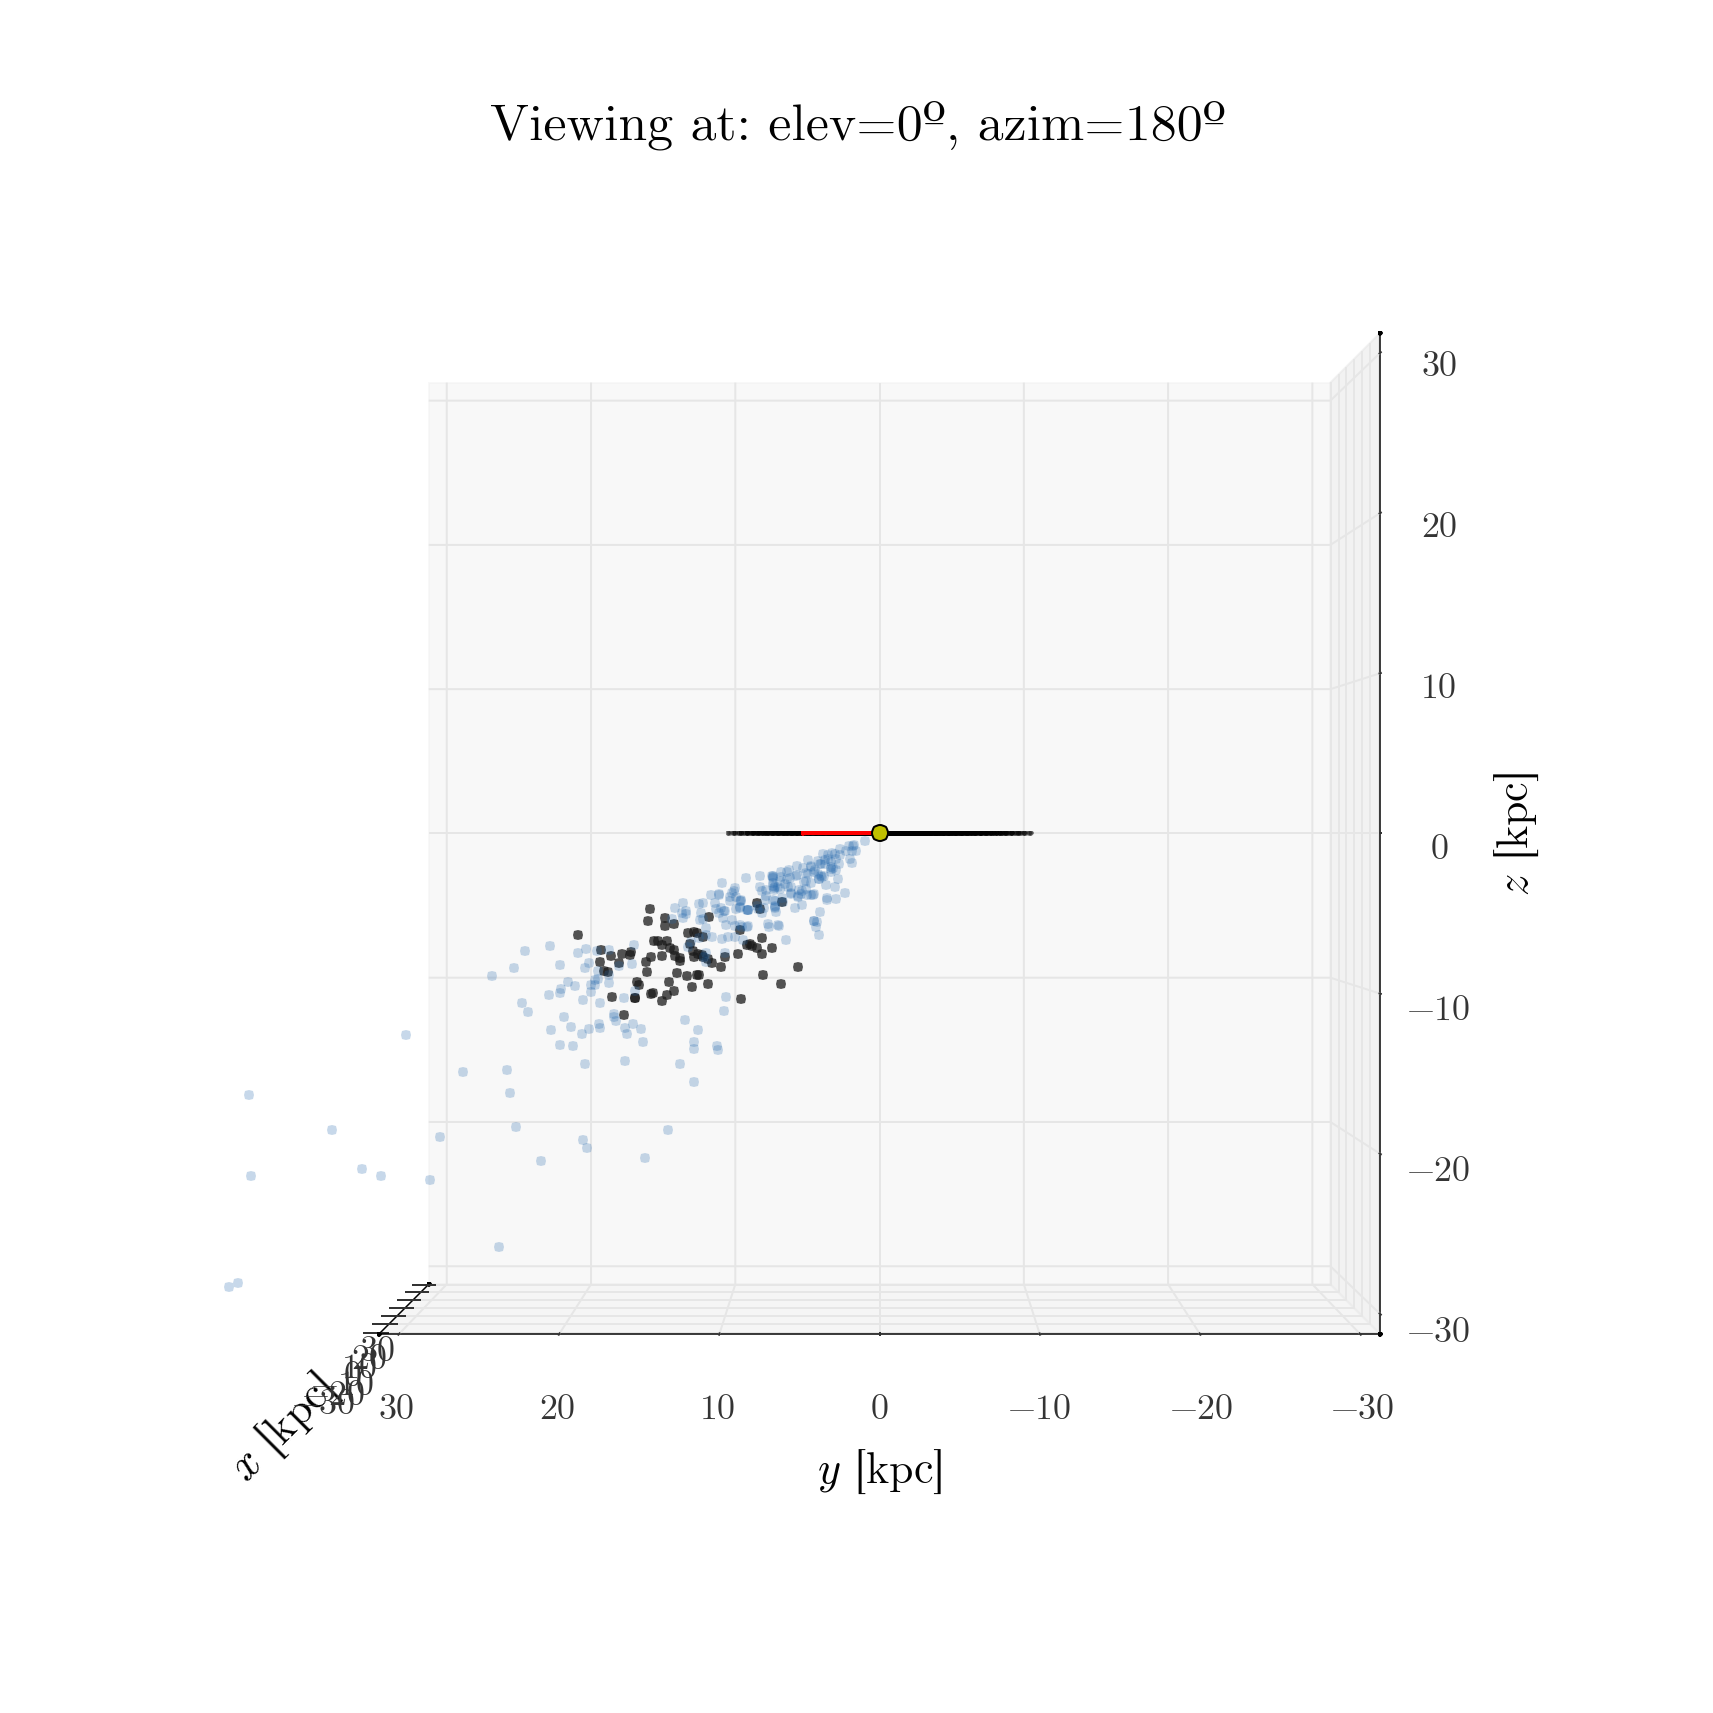

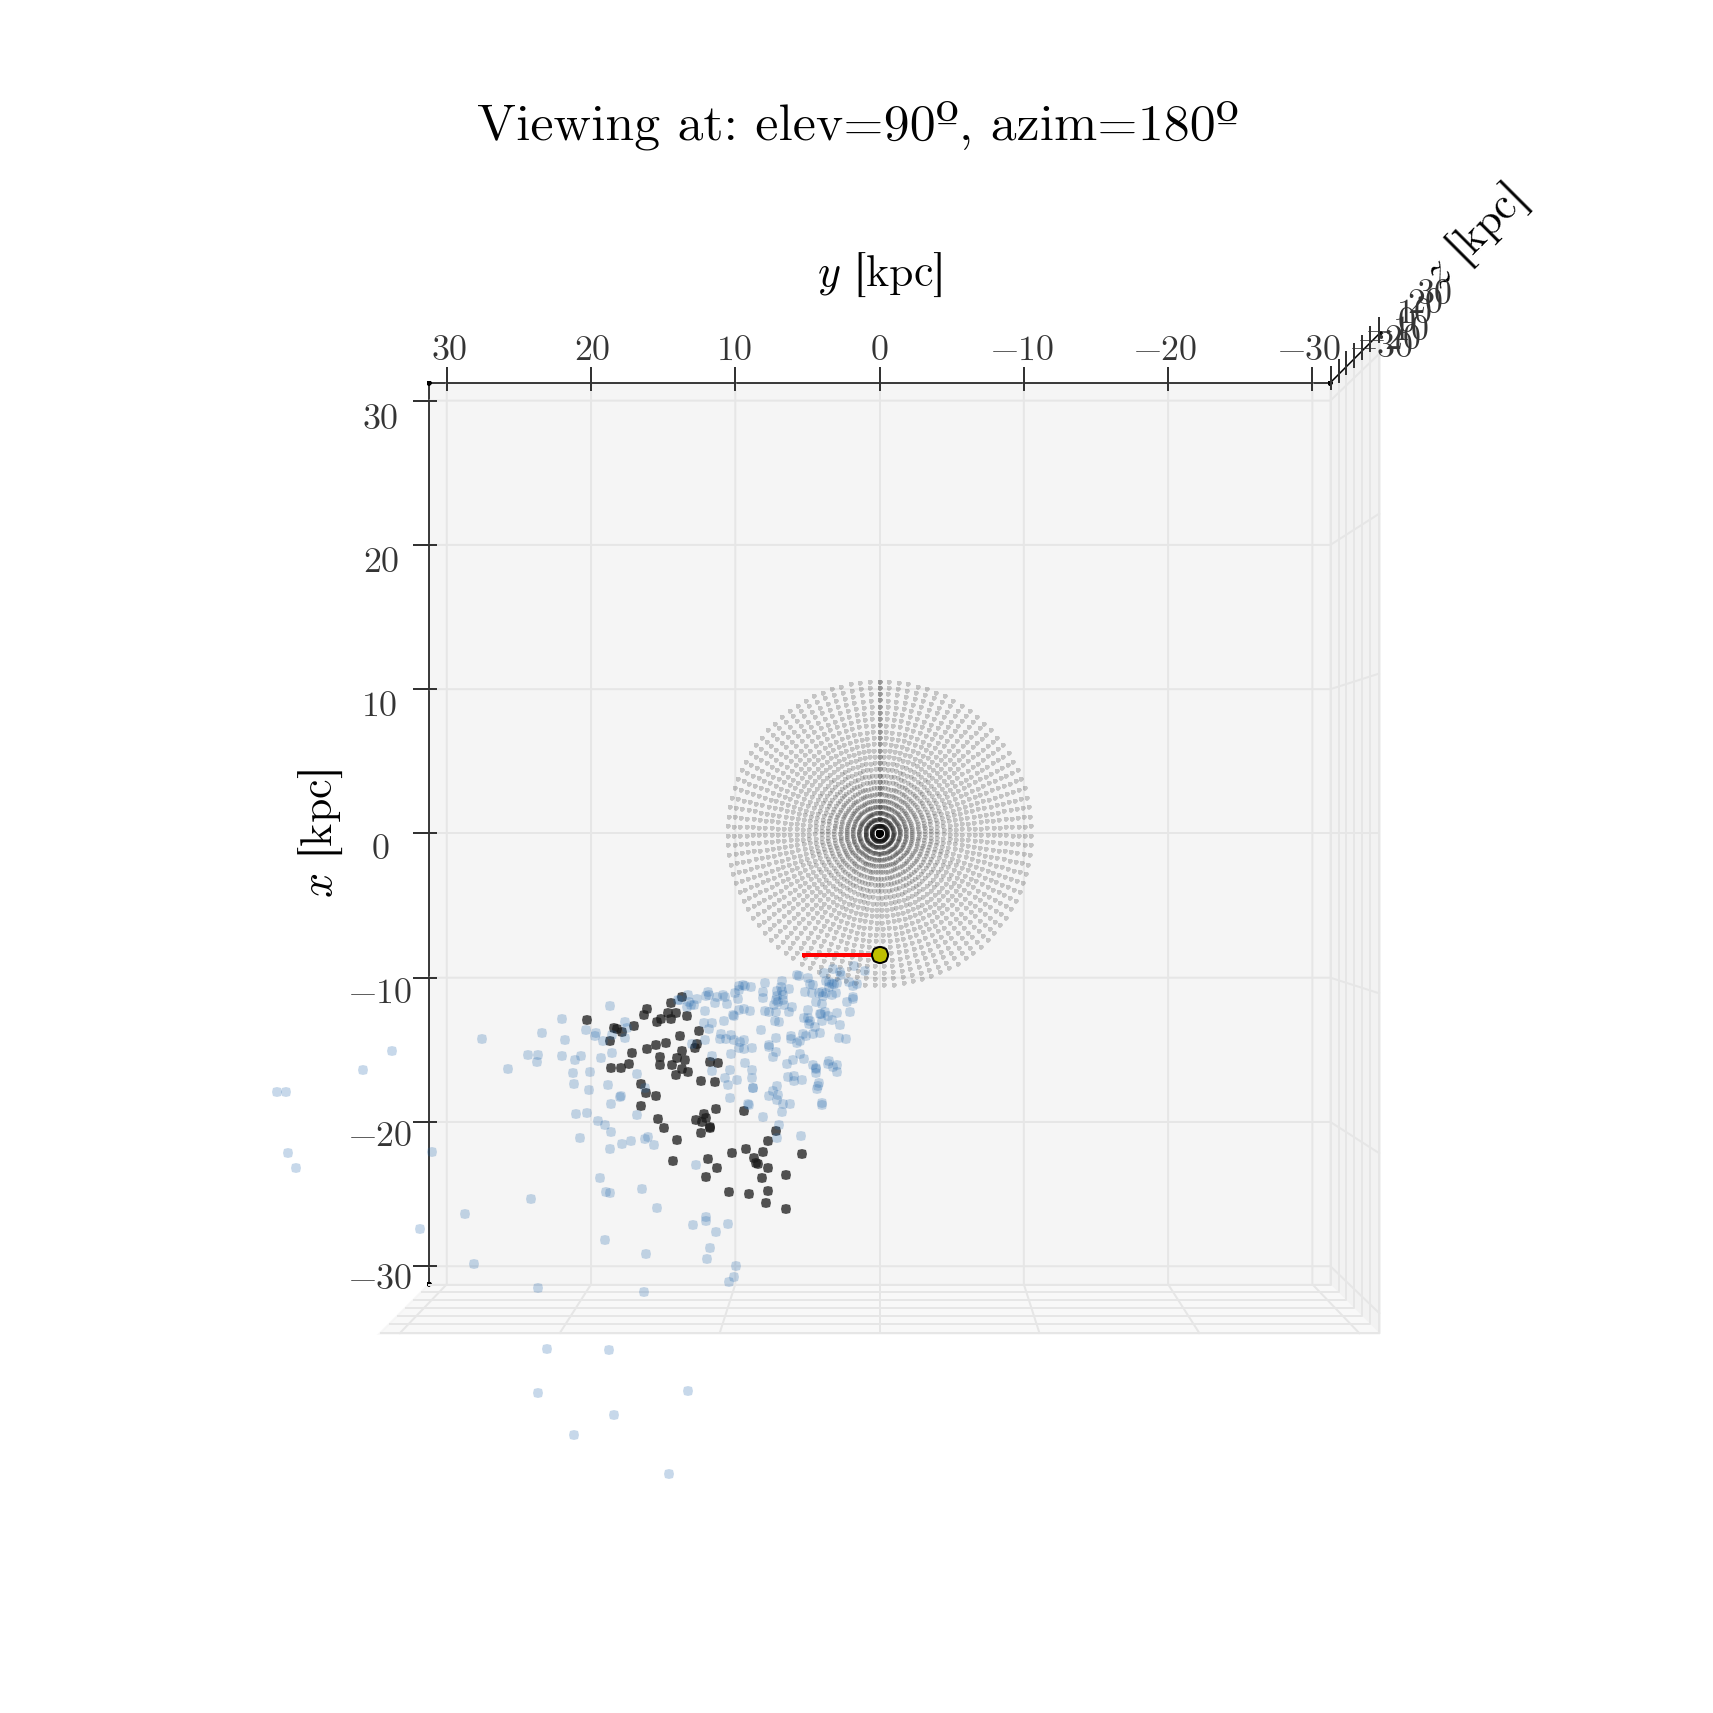

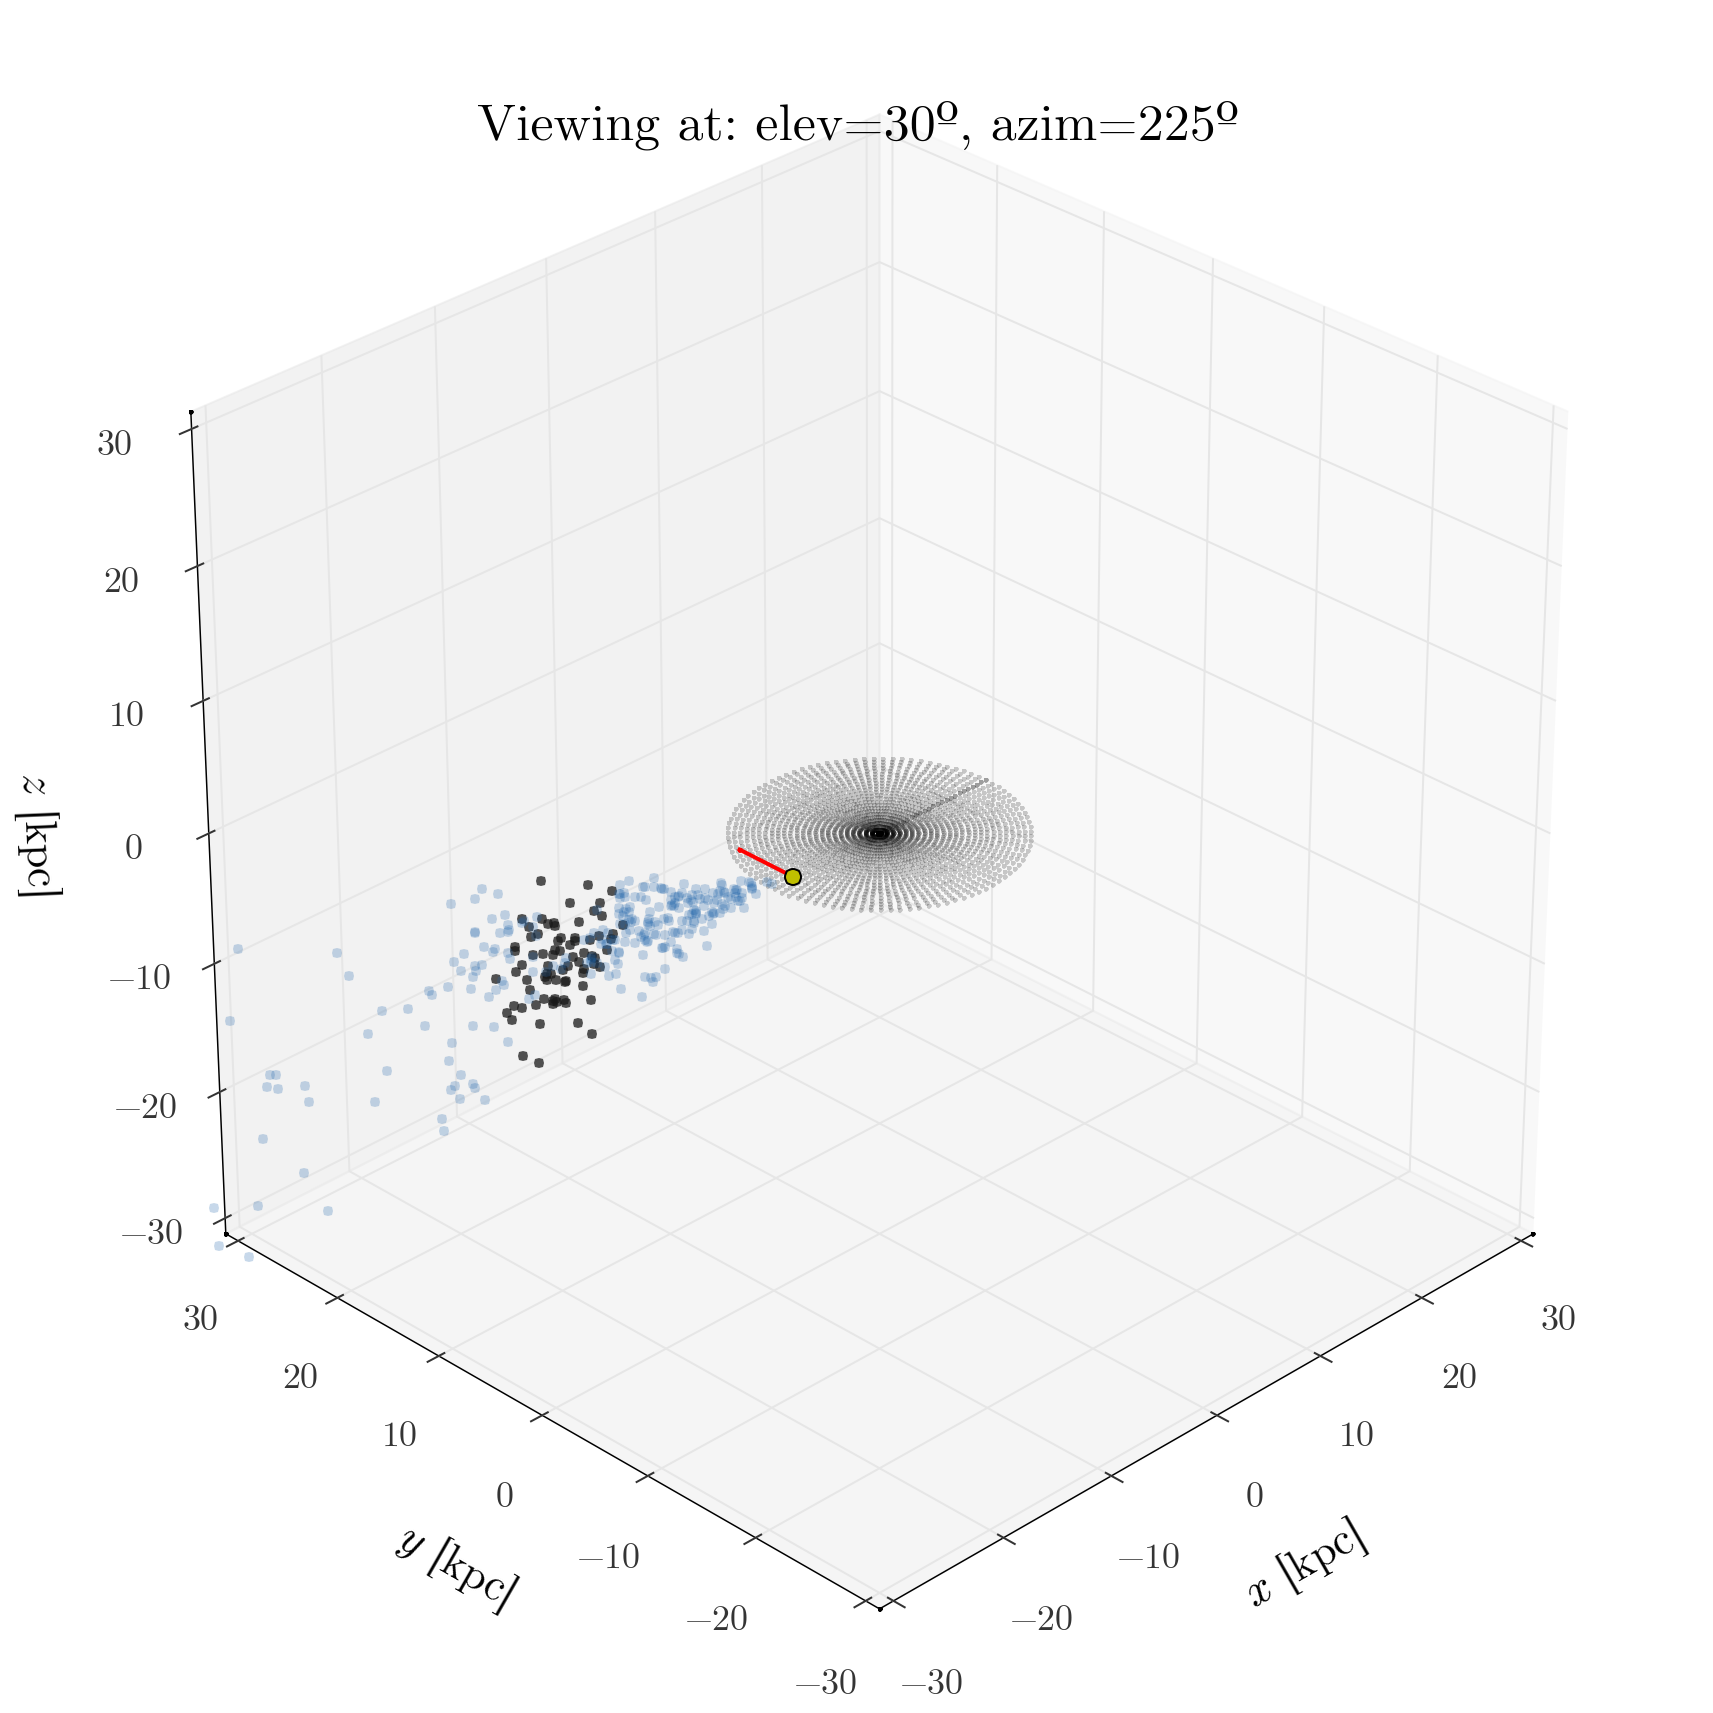

In [15]:
for elev,azim in zip([0,90,30],[180,180,225]):

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection="3d")

    for dd in np.linspace(0.1,10,25): # np.sqrt(np.linspace(0.1,10**2,10)):
        phi = np.linspace(0,360,100)*u.deg
        ax.plot(dd*np.cos(phi), dd*np.sin(phi), 0,
                marker='.',linestyle='none',alpha=0.2,color='k')

    ax.plot(xyz[0,d_ix], xyz[1,d_ix], xyz[2,d_ix], marker='o', linestyle='none', alpha=0.75, c='#0868ac')
    ax.plot(xyz[0,~d_ix], xyz[1,~d_ix], xyz[2,~d_ix], marker='o', linestyle='none', alpha=0.25, c='#0868ac')
    
    ax.plot([-8,-8], [0,5], [0,0], linestyle='-', lw=2., c='r')
    ax.plot([-8],[0],[0], marker='o', linestyle='none', color='y', ms=8, mew=1.)

    for w in 'xyz':
        eval("ax.set_{0}lim(-30,30)".format(w))
        eval("ax.set_{0}label('${0}$ [kpc]')".format(w))

    ax.elev = elev
    ax.azim = azim
    ax.set_title(u"Viewing at: elev={0:d}º, azim={1:d}º".format(elev, azim))
    fig.tight_layout()
    
#     fig.savefig("/Users/adrian/projects/triand-rrlyrae/plots/xyz_elev{}_azim{}.png".format(elev,azim))